In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
channel1='\'NDUFB8\''
channel='NDUFB8'

In [3]:
df = pd.read_csv('Model_metrics_AllPatients.csv')
df.head(2)

,Model_ID,Model,Dataset,Channel,Random_Seed,Random_Seed_Number,Epoch_Patience,n(total samples),P_actual(total patients),C_actual(total controls),P_actual/n,C_actual/n,C_CC,C_CP,P_CP,P_CC,P_CP/n,C_CC/n,P_CC/n,C_CP/n,Pres_P,Pres_C,Recall_P,Recall_C,F1_P,F1_C,macro_avg_Pres,macro_avg_Recall,macro_avg_F1,Test_Accuracy
0,VGG16AllPatientsAllChannels,VGG16,AllPatients,AllChannels,A,33,200,95,72,23,0.758,0.242,23,0,72,0,0.758,0.242,0.000,0.0,1.0,1.000,1.000,1.0,1.000,1.000,1.000,1.000,1.000,100.00
1,VGG16AllPatientsAllChannels,VGG16,AllPatients,AllChannels,B,47,200,95,72,23,0.758,0.242,23,0,71,1,0.747,0.242,0.011,0.0,1.0,0.958,0.986,1.0,0.993,0.979,0.979,0.993,0.986,98.95


In [4]:
#Select columns relevant for paper
df_concise= df[['Model_ID','Model','Dataset','Channel','Random_Seed','Test_Accuracy','macro_avg_Pres','macro_avg_Recall','macro_avg_F1']]

In [ ]:
#making other metrics same denomination as Test_accuracy
df_concise['macro_avg_Pres']=df_concise['macro_avg_Pres'].mul(100).round(2)
df_concise['macro_avg_Recall']=df_concise['macro_avg_Recall'].mul(100).round(2)
df_concise['macro_avg_F1']=df_concise['macro_avg_F1'].mul(100).round(2)

In [7]:
df_concise.head(2)

,Model_ID,Model,Dataset,Channel,Random_Seed,Test_Accuracy,macro_avg_Pres,macro_avg_Recall,macro_avg_F1
0,VGG16AllPatientsAllChannels,VGG16,AllPatients,AllChannels,A,100.00,100.0,100.0,100.0
1,VGG16AllPatientsAllChannels,VGG16,AllPatients,AllChannels,B,98.95,97.9,99.3,98.6


In [8]:
#Reshape table to show metrics for all seeds
df_concise= pd.pivot_table(df_concise, index=['Model_ID','Model','Dataset','Channel'],columns =['Random_Seed'],values =['Test_Accuracy','macro_avg_Pres','macro_avg_Recall','macro_avg_F1'])
df_concise= df_concise.reset_index()

In [9]:
#check column names and structure
#list(df_concise.columns)

In [10]:
df_concise

Model_ID       Model      Dataset  \
Random_Seed                                                             
0                  RESnet50v2AllPatientsCOX4  RESnet50v2  AllPatients   
1            RESnet50v2AllPatientsDystrophin  RESnet50v2  AllPatients   
2                RESnet50v2AllPatientsGRIM19  RESnet50v2  AllPatients   
3                 RESnet50v2AllPatientsMTCO1  RESnet50v2  AllPatients   
4                RESnet50v2AllPatientsNDUFB8  RESnet50v2  AllPatients   
5                  RESnet50v2AllPatientsOSCP  RESnet50v2  AllPatients   
6                  RESnet50v2AllPatientsSDHA  RESnet50v2  AllPatients   
7                 RESnet50v2AllPatientsTOM22  RESnet50v2  AllPatients   
8                RESnet50v2AllPatientsUqCRC2  RESnet50v2  AllPatients   
9                 RESnet50v2AllPatientsVDAC1  RESnet50v2  AllPatients   
10               VGG16AllPatientsAllChannels       VGG16  AllPatients   

                 Channel Test_Accuracy                       macro_avg_F1  \
Random_Seed                          A      B       C      D            A   
0                   COX4        100.00  96.43   85.71  89.29        100.0   
1             Dystrophin         96.43  96.43   92.86  92.86         93.4   
2                 GRIM19        100.00  92.86   92.86  96.43        100.0   
3                  MTCO1         67.86  82.14   75.00  92.86         49.1   
4                 NDUFB8         85.71  85.71   92.86  85.71         75.7   
5                   OSCP         92.86  96.43   92.86  92.86         91.8   
6                   SDHA         89.29  82.14   92.86  96.43         86.4   
7                  TOM22         71.43  85.71   89.29  85.71         51.3   
8                 UqCRC2        100.00  92.86  100.00  96.43        100.0   
9                  VDAC1         85.71  78.57   89.29  85.71         70.9   
10           AllChannels        100.00  98.95   98.95  98.95        100.0   

                               macro_avg_Pres                     \
Random_Seed     B      C     D              A     B      C     D   
0            93.4   70.9  85.0          100.0  90.0   92.3  83.3   
1            95.8   91.3  89.4           90.0  97.5   91.3  89.4   
2            92.2   90.5  95.0          100.0  92.2   95.5  92.9   
3            71.7   53.7  87.9           83.4  90.0   87.1  95.9   
4            83.7   89.4  81.0           92.0  83.7   89.4  91.3   
5            94.4   89.4  90.5           91.8  97.9   89.4  87.5   
6            81.0   91.3  93.4           93.2  80.5   91.3  97.9   
7            70.9   67.1  62.7           85.2  77.4   94.5  92.6   
8            85.4  100.0  94.4          100.0  85.4  100.0  91.7   
9            71.4   85.0  82.5           92.3  79.2   83.3  85.7   
10           98.6   98.6  98.6          100.0  97.9   99.3  97.9   

            macro_avg_Recall                     
Random_Seed                A     B      C     D  
0                      100.0  97.9   66.7  87.1  
1                       97.9  94.5   91.3  89.4  
2                      100.0  92.2   87.5  97.8  
3                       55.0  68.8   56.3  83.4  
4                       71.5  83.7   89.4  77.8  
5                       91.8  91.7   89.4  95.5  
6                       83.4  81.7   91.3  90.0  
7                       55.6  67.9   62.5  60.0  
8                      100.0  85.4  100.0  97.9  
9                       66.7  69.6   87.1  80.7  
10                     100.0  99.3   97.9  99.3

In [11]:
#Renaming column names
df_concise= df_concise.rename(columns={"A":"_Random_Seed_A","B":"_Random_Seed_B","C":"_Random_Seed_C","D":"_Random_Seed_D"})

In [12]:
#merging columns names
df_concise.columns = [f'{i}{j}' for i, j in df_concise.columns]
df_concise.columns = df_concise.columns.map(''.join)

In [13]:
df_concise.head(2)

,Model_ID,Model,Dataset,Channel,Test_Accuracy_Random_Seed_A,Test_Accuracy_Random_Seed_B,Test_Accuracy_Random_Seed_C,Test_Accuracy_Random_Seed_D,macro_avg_F1_Random_Seed_A,macro_avg_F1_Random_Seed_B,macro_avg_F1_Random_Seed_C,macro_avg_F1_Random_Seed_D,macro_avg_Pres_Random_Seed_A,macro_avg_Pres_Random_Seed_B,macro_avg_Pres_Random_Seed_C,macro_avg_Pres_Random_Seed_D,macro_avg_Recall_Random_Seed_A,macro_avg_Recall_Random_Seed_B,macro_avg_Recall_Random_Seed_C,macro_avg_Recall_Random_Seed_D
0,RESnet50v2AllPatientsCOX4,RESnet50v2,AllPatients,COX4,100.00,96.43,85.71,89.29,100.0,93.4,70.9,85.0,100.0,90.0,92.3,83.3,100.0,97.9,66.7,87.1
1,RESnet50v2AllPatientsDystrophin,RESnet50v2,AllPatients,Dystrophin,96.43,96.43,92.86,92.86,93.4,95.8,91.3,89.4,90.0,97.5,91.3,89.4,97.9,94.5,91.3,89.4


In [14]:
# Add mean, variance and standard deviation column for each metric

# Mean
df_concise['Mean_Test_Accuracy']=df_concise[['Test_Accuracy_Random_Seed_A','Test_Accuracy_Random_Seed_B','Test_Accuracy_Random_Seed_C','Test_Accuracy_Random_Seed_D']].mean(axis=1)
df_concise['Mean_macro_avg_F1']=df_concise[['macro_avg_F1_Random_Seed_A','macro_avg_F1_Random_Seed_B','macro_avg_F1_Random_Seed_C','macro_avg_F1_Random_Seed_D']].mean(axis=1)
df_concise['Mean_macro_avg_Pres']=df_concise[['macro_avg_Pres_Random_Seed_A','macro_avg_Pres_Random_Seed_B','macro_avg_Pres_Random_Seed_C','macro_avg_Pres_Random_Seed_D']].mean(axis=1)
df_concise['Mean_macro_avg_Recall']=df_concise[['macro_avg_Recall_Random_Seed_A','macro_avg_Recall_Random_Seed_B','macro_avg_Recall_Random_Seed_C','macro_avg_Recall_Random_Seed_D']].mean(axis=1)

#Standard Deviation
df_concise['Std_Test_Accuracy']=df_concise[['Test_Accuracy_Random_Seed_A','Test_Accuracy_Random_Seed_B','Test_Accuracy_Random_Seed_C','Test_Accuracy_Random_Seed_D']].std(axis=1)
df_concise['Std_macro_avg_F1']=df_concise[['macro_avg_F1_Random_Seed_A','macro_avg_F1_Random_Seed_B','macro_avg_F1_Random_Seed_C','macro_avg_F1_Random_Seed_D']].std(axis=1)
df_concise['Std_macro_avg_Pres']=df_concise[['macro_avg_Pres_Random_Seed_A','macro_avg_Pres_Random_Seed_B','macro_avg_Pres_Random_Seed_C','macro_avg_Pres_Random_Seed_D']].std(axis=1)
df_concise['Std_macro_avg_Recall']=df_concise[['macro_avg_Recall_Random_Seed_A','macro_avg_Recall_Random_Seed_B','macro_avg_Recall_Random_Seed_C','macro_avg_Recall_Random_Seed_D']].std(axis=1)

#Variance 
df_concise['Var_Test_Accuracy']=df_concise[['Test_Accuracy_Random_Seed_A','Test_Accuracy_Random_Seed_B','Test_Accuracy_Random_Seed_C','Test_Accuracy_Random_Seed_D']].var(axis=1)
df_concise['Var_macro_avg_F1']=df_concise[['macro_avg_F1_Random_Seed_A','macro_avg_F1_Random_Seed_B','macro_avg_F1_Random_Seed_C','macro_avg_F1_Random_Seed_D']].var(axis=1)
df_concise['Var_macro_avg_Pres']=df_concise[['macro_avg_Pres_Random_Seed_A','macro_avg_Pres_Random_Seed_B','macro_avg_Pres_Random_Seed_C','macro_avg_Pres_Random_Seed_D']].var(axis=1)
df_concise['Var_macro_avg_Recall']=df_concise[['macro_avg_Recall_Random_Seed_A','macro_avg_Recall_Random_Seed_B','macro_avg_Recall_Random_Seed_C','macro_avg_Recall_Random_Seed_D']].var(axis=1)




In [15]:
df_concise.sort_values('Mean_Test_Accuracy',ascending=False)

,Model_ID,Model,Dataset,Channel,Test_Accuracy_Random_Seed_A,Test_Accuracy_Random_Seed_B,Test_Accuracy_Random_Seed_C,Test_Accuracy_Random_Seed_D,macro_avg_F1_Random_Seed_A,macro_avg_F1_Random_Seed_B,macro_avg_F1_Random_Seed_C,macro_avg_F1_Random_Seed_D,macro_avg_Pres_Random_Seed_A,macro_avg_Pres_Random_Seed_B,macro_avg_Pres_Random_Seed_C,macro_avg_Pres_Random_Seed_D,macro_avg_Recall_Random_Seed_A,macro_avg_Recall_Random_Seed_B,macro_avg_Recall_Random_Seed_C,macro_avg_Recall_Random_Seed_D,Mean_Test_Accuracy,Mean_macro_avg_F1,Mean_macro_avg_Pres,Mean_macro_avg_Recall,Std_Test_Accuracy,Std_macro_avg_F1,Std_macro_avg_Pres,Std_macro_avg_Recall,Var_Test_Accuracy,Var_macro_avg_F1,Var_macro_avg_Pres,Var_macro_avg_Recall
10,VGG16AllPatientsAllChannels,VGG16,AllPatients,AllChannels,100.00,98.95,98.95,98.95,100.0,98.6,98.6,98.6,100.0,97.9,99.3,97.9,100.0,99.3,97.9,99.3,99.2125,98.950,98.775,99.125,0.525000,0.700000,1.050000,0.880814,0.275625,0.490000,1.102500,0.775833
8,RESnet50v2AllPatientsUqCRC2,RESnet50v2,AllPatients,UqCRC2,100.00,92.86,100.00,96.43,100.0,85.4,100.0,94.4,100.0,85.4,100.0,91.7,100.0,85.4,100.0,97.9,97.3225,94.950,94.275,95.825,3.418015,6.892266,7.093365,7.020150,11.682825,47.503333,50.315833,49.282500
2,RESnet50v2AllPatientsGRIM19,RESnet50v2,AllPatients,GRIM19,100.00,92.86,92.86,96.43,100.0,92.2,90.5,95.0,100.0,92.2,95.5,92.9,100.0,92.2,87.5,97.8,95.5375,94.425,95.150,94.375,3.418015,4.154014,3.531289,5.638188,11.682825,17.255833,12.470000,31.789167
1,RESnet50v2AllPatientsDystrophin,RESnet50v2,AllPatients,Dystrophin,96.43,96.43,92.86,92.86,93.4,95.8,91.3,89.4,90.0,97.5,91.3,89.4,97.9,94.5,91.3,89.4,94.6450,92.475,92.050,93.275,2.061140,2.753634,3.718871,3.733073,4.248300,7.582500,13.830000,13.935833
5,RESnet50v2AllPatientsOSCP,RESnet50v2,AllPatients,OSCP,92.86,96.43,92.86,92.86,91.8,94.4,89.4,90.5,91.8,97.9,89.4,87.5,91.8,91.7,89.4,95.5,93.7525,91.525,91.650,92.100,1.785000,2.153099,4.522905,2.523225,3.186225,4.635833,20.456667,6.366667
0,RESnet50v2AllPatientsCOX4,RESnet50v2,AllPatients,COX4,100.00,96.43,85.71,89.29,100.0,93.4,70.9,85.0,100.0,90.0,92.3,83.3,100.0,97.9,66.7,87.1,92.8575,87.325,91.400,87.925,6.521551,12.553187,6.888154,15.236880,42.530625,157.582500,47.446667,232.162500
6,RESnet50v2AllPatientsSDHA,RESnet50v2,AllPatients,SDHA,89.29,82.14,92.86,96.43,86.4,81.0,91.3,93.4,93.2,80.5,91.3,97.9,83.4,81.7,91.3,90.0,90.1800,88.025,90.725,86.600,6.101328,5.525924,7.359518,4.757450,37.226200,30.535833,54.162500,22.633333
4,RESnet50v2AllPatientsNDUFB8,RESnet50v2,AllPatients,NDUFB8,85.71,85.71,92.86,85.71,75.7,83.7,89.4,81.0,92.0,83.7,89.4,91.3,71.5,83.7,89.4,77.8,87.4975,82.450,89.100,80.600,3.575000,5.701754,3.763863,7.696319,12.780625,32.510000,14.166667,59.233333
9,RESnet50v2AllPatientsVDAC1,RESnet50v2,AllPatients,VDAC1,85.71,78.57,89.29,85.71,70.9,71.4,85.0,82.5,92.3,79.2,83.3,85.7,66.7,69.6,87.1,80.7,84.8200,77.450,85.125,76.025,4.495464,7.348696,5.484752,9.534979,20.209200,54.003333,30.082500,90.915833
7,RESnet50v2AllPatientsTOM22,RESnet50v2,AllPatients,TOM22,71.43,85.71,89.29,85.71,51.3,70.9,67.1,62.7,85.2,77.4,94.5,92.6,55.6,67.9,62.5,60.0,83.0350,63.000,87.425,61.500,7.918592,8.489209,7.795030,5.132251,62.704100,72.066667,60.762500,26.340000


In [16]:
# Table for Paper
df_paper= df_concise[['Model', 'Dataset','Channel','Test_Accuracy_Random_Seed_A','Test_Accuracy_Random_Seed_B','Test_Accuracy_Random_Seed_C','Test_Accuracy_Random_Seed_D','Mean_Test_Accuracy','Std_Test_Accuracy','Var_Test_Accuracy']]

In [17]:
df_paper.sort_values('Mean_Test_Accuracy', ascending=False)


,Model,Dataset,Channel,Test_Accuracy_Random_Seed_A,Test_Accuracy_Random_Seed_B,Test_Accuracy_Random_Seed_C,Test_Accuracy_Random_Seed_D,Mean_Test_Accuracy,Std_Test_Accuracy,Var_Test_Accuracy
10,VGG16,AllPatients,AllChannels,100.00,98.95,98.95,98.95,99.2125,0.525000,0.275625
8,RESnet50v2,AllPatients,UqCRC2,100.00,92.86,100.00,96.43,97.3225,3.418015,11.682825
2,RESnet50v2,AllPatients,GRIM19,100.00,92.86,92.86,96.43,95.5375,3.418015,11.682825
1,RESnet50v2,AllPatients,Dystrophin,96.43,96.43,92.86,92.86,94.6450,2.061140,4.248300
5,RESnet50v2,AllPatients,OSCP,92.86,96.43,92.86,92.86,93.7525,1.785000,3.186225
0,RESnet50v2,AllPatients,COX4,100.00,96.43,85.71,89.29,92.8575,6.521551,42.530625
6,RESnet50v2,AllPatients,SDHA,89.29,82.14,92.86,96.43,90.1800,6.101328,37.226200
4,RESnet50v2,AllPatients,NDUFB8,85.71,85.71,92.86,85.71,87.4975,3.575000,12.780625
9,RESnet50v2,AllPatients,VDAC1,85.71,78.57,89.29,85.71,84.8200,4.495464,20.209200
7,RESnet50v2,AllPatients,TOM22,71.43,85.71,89.29,85.71,83.0350,7.918592,62.704100


In [16]:
df_paper.to_csv('./table_models_metrics_AllPatients.csv')

In [220]:
#df['Test_Accuracy']=df['Test_Accuracy'].div(100).round(3)

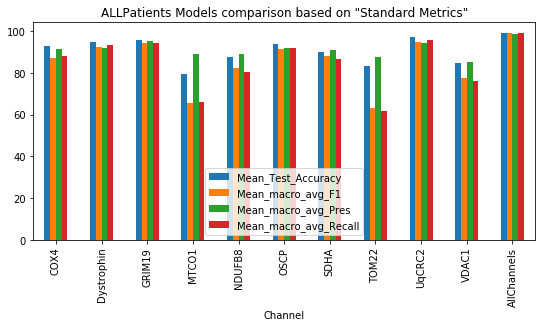

In [37]:
df_concise.plot(x='Channel',y=['Mean_Test_Accuracy','Mean_macro_avg_F1','Mean_macro_avg_Pres','Mean_macro_avg_Recall'],kind="bar",figsize=(9,4),title=f"ALLPatients Models comparison based on \"Standard Metrics\"")

In [21]:
#Patient Centric

df_concise_Patients= df[['Model_ID','Model','Dataset','Channel','Random_Seed','Test_Accuracy','Pres_P','Recall_P','F1_P']]

In [ ]:
#making other metrics same denomination as Test_accuracy
df_concise_Patients['Pres_P']=df_concise_Patients['Pres_P'].mul(100).round(2)
df_concise_Patients['Recall_P']=df_concise_Patients['Recall_P'].mul(100).round(2)
df_concise_Patients['F1_P']=df_concise_Patients['F1_P'].mul(100).round(2)

In [23]:
#Reshape table to show metrics for all seeds
df_concise_Patients= pd.pivot_table(df_concise_Patients, index=['Model_ID','Model','Dataset','Channel'],columns =['Random_Seed'],values =['Test_Accuracy','Pres_P','Recall_P','F1_P'])
df_concise_Patients= df_concise_Patients.reset_index()

In [24]:
#Renaming column names
df_concise_Patients= df_concise_Patients.rename(columns={"A":"_Random_Seed_A","B":"_Random_Seed_B","C":"_Random_Seed_C","D":"_Random_Seed_D"})

In [25]:
#merging columns names
df_concise_Patients.columns = [f'{i}{j}' for i, j in df_concise_Patients.columns]
df_concise_Patients.columns = df_concise_Patients.columns.map(''.join)

In [26]:
# Add mean, variance and standard deviation column for each metric

# Mean
df_concise_Patients['Mean_Test_Accuracy']=df_concise_Patients[['Test_Accuracy_Random_Seed_A','Test_Accuracy_Random_Seed_B','Test_Accuracy_Random_Seed_C','Test_Accuracy_Random_Seed_D']].mean(axis=1)
df_concise_Patients['Mean_F1_P']=df_concise_Patients[['F1_P_Random_Seed_A','F1_P_Random_Seed_B','F1_P_Random_Seed_C','F1_P_Random_Seed_D']].mean(axis=1)
df_concise_Patients['Mean_Pres_P']=df_concise_Patients[['Pres_P_Random_Seed_A','Pres_P_Random_Seed_B','Pres_P_Random_Seed_C','Pres_P_Random_Seed_D']].mean(axis=1)
df_concise_Patients['Mean_Recall_P']=df_concise_Patients[['Recall_P_Random_Seed_A','Recall_P_Random_Seed_B','Recall_P_Random_Seed_C','Recall_P_Random_Seed_D']].mean(axis=1)

#Standard Deviation
df_concise_Patients['Std_Test_Accuracy']=df_concise_Patients[['Test_Accuracy_Random_Seed_A','Test_Accuracy_Random_Seed_B','Test_Accuracy_Random_Seed_C','Test_Accuracy_Random_Seed_D']].std(axis=1)
df_concise_Patients['Std_F1_P']=df_concise_Patients[['F1_P_Random_Seed_A','F1_P_Random_Seed_B','F1_P_Random_Seed_C','F1_P_Random_Seed_D']].std(axis=1)
df_concise_Patients['Std_Pres_P']=df_concise_Patients[['Pres_P_Random_Seed_A','Pres_P_Random_Seed_B','Pres_P_Random_Seed_C','Pres_P_Random_Seed_D']].std(axis=1)
df_concise_Patients['Std_Recall_P']=df_concise_Patients[['Recall_P_Random_Seed_A','Recall_P_Random_Seed_B','Recall_P_Random_Seed_C','Recall_P_Random_Seed_D']].std(axis=1)

#Variance 
df_concise_Patients['Var_Test_Accuracy']=df_concise_Patients[['Test_Accuracy_Random_Seed_A','Test_Accuracy_Random_Seed_B','Test_Accuracy_Random_Seed_C','Test_Accuracy_Random_Seed_D']].var(axis=1)
df_concise_Patients['Var_F1_P']=df_concise_Patients[['F1_P_Random_Seed_A','F1_P_Random_Seed_B','F1_P_Random_Seed_C','F1_P_Random_Seed_D']].var(axis=1)
df_concise_Patients['Var_Pres_P']=df_concise_Patients[['Pres_P_Random_Seed_A','Pres_P_Random_Seed_B','Pres_P_Random_Seed_C','Pres_P_Random_Seed_D']].var(axis=1)
df_concise_Patients['Var_Recall_P']=df_concise_Patients[['Recall_P_Random_Seed_A','Recall_P_Random_Seed_B','Recall_P_Random_Seed_C','Recall_P_Random_Seed_D']].var(axis=1)


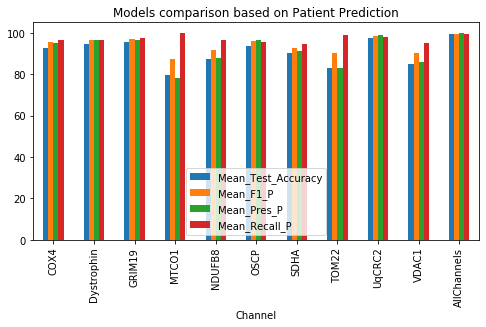

In [35]:
df_concise_Patients.plot(x='Channel',y=['Mean_Test_Accuracy','Mean_F1_P','Mean_Pres_P','Mean_Recall_P'],kind="bar",figsize=(8,4),title=f"Models comparison based on Patient Prediction")

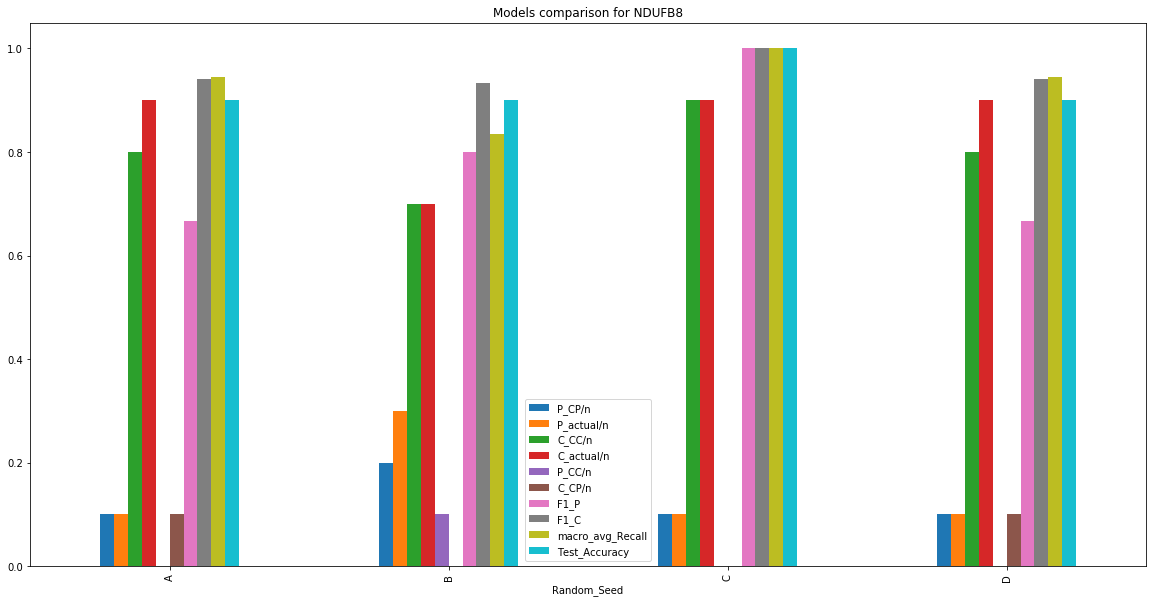

In [115]:
df.loc[df['Channel']==f"{channel}"].plot(x='Random_Seed', y=['P_CP/n','P_actual/n','C_CC/n','C_actual/n','P_CC/n','C_CP/n','F1_P','F1_C','macro_avg_Recall','Test_Accuracy'], kind="bar",figsize=(20,10),title=f"Models comparison for {channel}")